In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

dataset = pd.read_csv('Phishing_Legitimate_full.csv')
float_cols = dataset.select_dtypes('float64').columns
for c in float_cols:
    dataset[c] = dataset[c].astype('int')
    
int_cols = dataset.select_dtypes('int64').columns
for c in int_cols:
    dataset[c] = dataset[c].astype('int32')
    
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   id                                  10000 non-null  int32
 1   NumDots                             10000 non-null  int32
 2   SubdomainLevel                      10000 non-null  int32
 3   PathLevel                           10000 non-null  int32
 4   UrlLength                           10000 non-null  int32
 5   NumDash                             10000 non-null  int32
 6   NumDashInHostname                   10000 non-null  int32
 7   AtSymbol                            10000 non-null  int32
 8   TildeSymbol                         10000 non-null  int32
 9   NumUnderscore                       10000 non-null  int32
 10  NumPercent                          10000 non-null  int32
 11  NumQueryComponents                  10000 non-null  int32
 12  NumAm

In [4]:
def corr_heatmap(dataset, idx_s, idx_e):
    y = dataset['CLASS_LABEL']
    temp = dataset.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

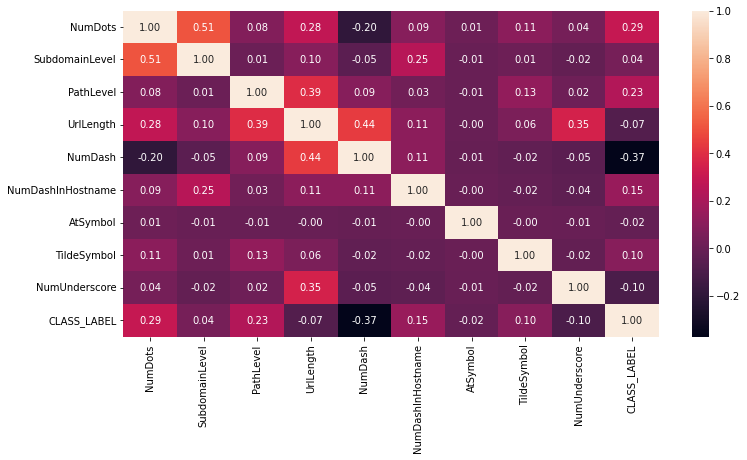

In [184]:
corr_heatmap(dataset, 0, 10)

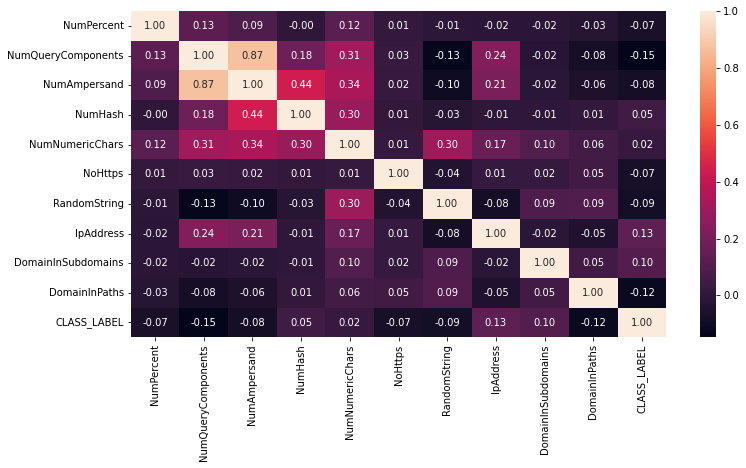

In [185]:
corr_heatmap(dataset, 10, 20)

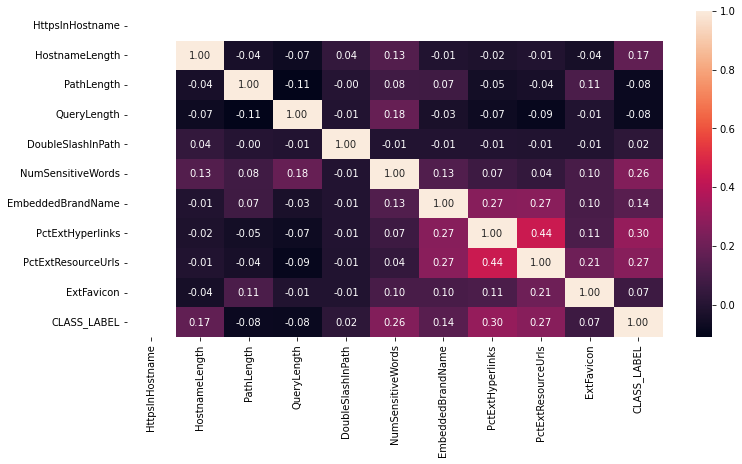

In [186]:
corr_heatmap(dataset, 20, 30)

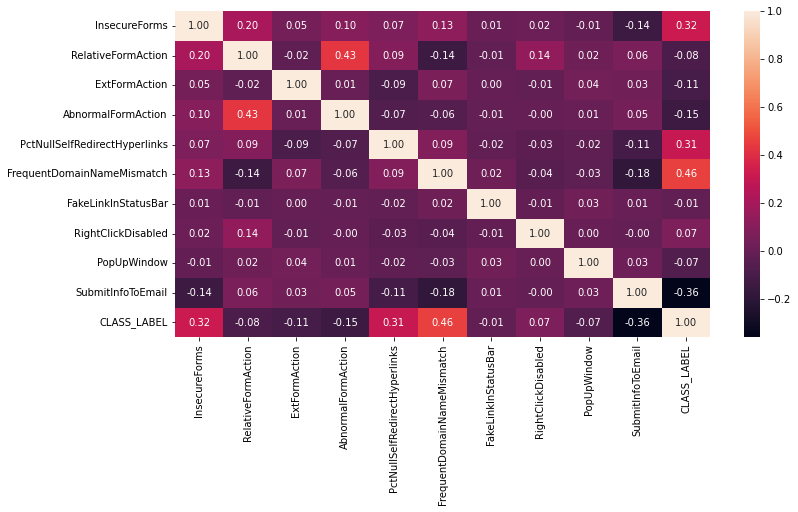

In [187]:
corr_heatmap(dataset, 30, 40)

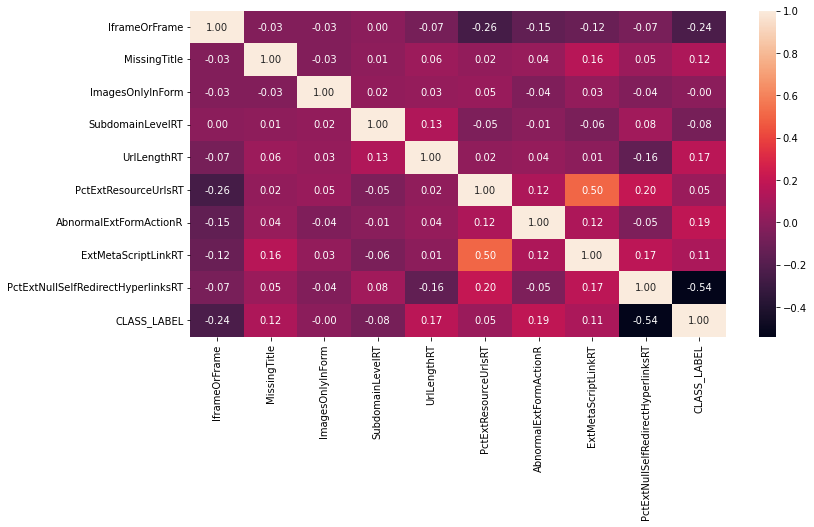

In [188]:
corr_heatmap(dataset, 40, 50)

Accuracy: 0.825 (0.034)


In [5]:
from sklearn.feature_selection import mutual_info_classif


#dataset['PctExtHyperlinks'] = dataset['PctExtHyperlinks'].astype(int)
#dataset['PctExtResourceUrls'] = dataset['PctExtResourceUrls'].astype(int)
#dataset['PctNullSelfRedirectHyperlinks'] = dataset['PctNullSelfRedirectHyperlinks'].astype(int)
X = dataset.drop(['id','CLASS_LABEL'], axis=1)
y = dataset.drop(['CLASS_LABEL'], axis=1)
y = np.reshape(y (-1, 1))
y = y.dtypes == int
X = X.dtypes == int
X.reshape(1,-1)
discrete_features = X.dtypes == int

In [6]:
from sklearn import preprocessing
from sklearn import utils

X = dataset.drop(['id', 'CLASS_LABEL'], axis=1)
y = dataset['CLASS_LABEL']

discrete_features = X.dtypes == int

#convert y values to categorical values
#lab = preprocessing.LabelEncoder()
#Y = lab.fit_transform(y)


In [7]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores,  name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PctNullSelfRedirectHyperlinks         6.469327e-02
PathLength                            6.413269e-02
PctExtHyperlinks                      5.875207e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
PctExtResourceUrls                    3.856134e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = dataset[top_n_features]
    y = dataset['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [11]:
tee = []
for i in range(10,51,1):
    precision, recall, f1, accuracy = train_logistic(dataset, i)
    print("Performance for Model with top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    tee.append([i, precision, recall, f1, accuracy])

Performance for Model with top 10 features is precision : 0.8659384309831182, recall : 0.8702594810379242, f1 score : 0.8680935788949726, accuracy : 0.8675
Performance for Model with top 11 features is precision : 0.8717171717171717, recall : 0.8544554455445544, f1 score : 0.863, accuracy : 0.863
Performance for Model with top 12 features is precision : 0.8905325443786982, recall : 0.8870333988212181, f1 score : 0.8887795275590551, accuracy : 0.887
Performance for Model with top 13 features is precision : 0.891726251276813, recall : 0.8890020366598778, f1 score : 0.8903620601733809, accuracy : 0.8925
Performance for Model with top 14 features is precision : 0.8860887096774194, recall : 0.904320987654321, f1 score : 0.8951120162932791, accuracy : 0.897
Performance for Model with top 15 features is precision : 0.9040959040959041, recall : 0.9159919028340081, f1 score : 0.9100050276520865, accuracy : 0.9105
Performance for Model with top 16 features is precision : 0.8851963746223565, reca

In [12]:
df = pd.DataFrame(tee, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,10,0.865938,0.870259,0.868094,0.8675
1,11,0.871717,0.854455,0.863000,0.8630
2,12,0.890533,0.887033,0.888780,0.8870
3,13,0.891726,0.889002,0.890362,0.8925
4,14,0.886089,0.904321,0.895112,0.8970
5,15,0.904096,0.915992,0.910005,0.9105
6,16,0.885196,0.897855,0.891481,0.8930
7,17,0.897959,0.904110,0.901024,0.8985
8,18,0.906931,0.919679,0.913260,0.9130
9,19,0.896092,0.942828,0.918866,0.9170


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

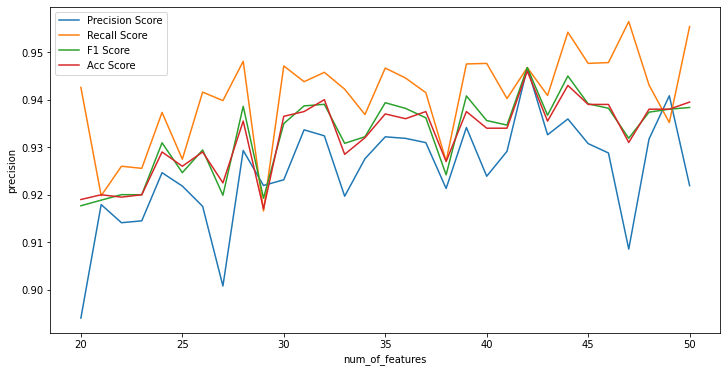

In [177]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [1]:
import os, pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Phishing_Legitimate_full.csv')

In [3]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X 

In [4]:
unwanted_cols = ['domain', 'CLASS_LABEL']

feature_columns = [i for i in df.columns if i not in unwanted_cols]

target_column = 'CLASS_LABEL'

df[target_column] = df[target_column]

features, targets = df[feature_columns], df[target_column]

features.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [5]:
train_size = 0.80
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

X_train

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9254,9255,2,1,2,41,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
1561,1562,3,1,3,40,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,-1,1
1670,1671,3,0,4,53,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,-1
6087,6088,3,1,2,89,12,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,1
6669,6670,1,0,4,101,6,0,0,0,3,...,0,0,0,0,1,-1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,0,1,60,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
5191,5192,3,1,2,116,1,0,0,0,2,...,0,0,0,0,1,-1,1,1,1,1
5390,5391,1,0,5,60,1,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
860,861,2,0,3,50,0,0,0,0,1,...,0,0,0,0,1,1,1,1,-1,1


In [6]:
scaler = Scaler(StandardScaler)
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_train

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9254,1.469277,-0.328137,0.568591,-0.696250,-0.877181,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,0.725112,-1.530049,1.101409,-0.347514
1561,-1.194994,0.414674,0.568591,-0.162878,-0.907410,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,-1.528101,0.394541,-1.556592,0.765866
1670,-1.157244,0.414674,-0.805232,0.370493,-0.514433,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,0.725112,0.394541,-0.227591,-1.460893
6087,0.372469,0.414674,0.568591,-0.696250,0.573810,3.244529,-0.255072,-0.019369,-0.115879,-0.289583,...,2.614470,-0.721943,-0.185455,-0.175863,0.176012,-1.250769,0.725112,0.394541,1.101409,0.765866
6669,0.574030,-1.070947,-0.805232,0.370493,0.936558,1.331998,-0.255072,-0.019369,-0.115879,2.433766,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,-1.250769,0.725112,0.394541,-0.227591,0.765866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.250217,-0.328137,-0.805232,-1.229621,-0.302830,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,-0.029017,0.725112,0.394541,-0.227591,0.765866
5191,0.062163,0.414674,0.568591,-0.696250,1.389993,-0.261778,-0.255072,-0.019369,-0.115879,1.525983,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,-1.250769,0.725112,0.394541,1.101409,0.765866
5390,0.131081,-1.070947,-0.805232,0.903865,-0.302830,-0.261778,-0.255072,-0.019369,-0.115879,-0.289583,...,2.614470,-0.721943,-0.185455,-0.175863,0.176012,-0.029017,0.725112,0.394541,-0.227591,0.765866
860,-1.437767,-0.328137,-0.805232,-0.162878,-0.605120,-0.580533,-0.255072,-0.019369,-0.115879,0.618200,...,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,0.725112,0.394541,-1.556592,0.765866


confusion matrix plot for training data:


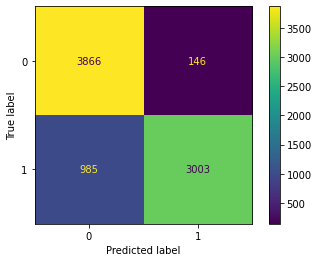



training accuracy of model: 85.8625%


In [8]:
#training
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)

print('confusion matrix plot for training data:')
cm = confusion_matrix(y_train, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()

print(f'\n\ntraining accuracy of model: {round(accuracy_score(y_train, pred)*100, 4)}%')

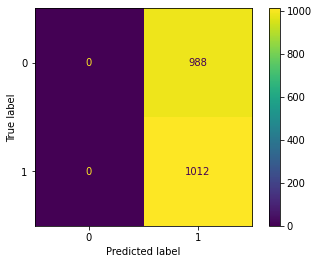

testing accuracy of model: 50.6%


In [9]:
#testing
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()

print(f'testing accuracy of model: {round(accuracy_score(y_test, pred)*100, 4)}%')

In [10]:
working_dir = './Models'
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)

pickle.dump(scaler, open(os.path.join(working_dir, 'scaler_model.sav'), 'wb'))
pickle.dump(naive_bayes, open(os.path.join(working_dir, 'GNB_model.sav'), 'wb'))

print('models saved successfully.')

models saved successfully.
